In [1]:
%matplotlib notebook

import numpy as np

# ICEWS Networks During the Obama Administration

## 4 Layers, 96 time-stamps (monthly), 65 nodes, 20% of dyads held-out of each network

In [5]:
from multidynet.datasets import load_icews
from multidynet.plots import plot_network
from multidynet.model_selection import train_test_split

Y, countries, layer_labels = load_icews()

# Hold-out 10% of dyads for testing
Y_train, test_indices = train_test_split(Y, test_size=0.2, random_state=42)

In [7]:
(np.count_nonzero(Y_train == 1, axis=(2, 3))  / 2).max()

579.0

In [9]:
import joblib

model = joblib.load(open('icews-model_2009-2017_n65_h20_i10.pkl', 'rb'))

# Goodness-of-Fit

<IPython.core.display.Javascript object>


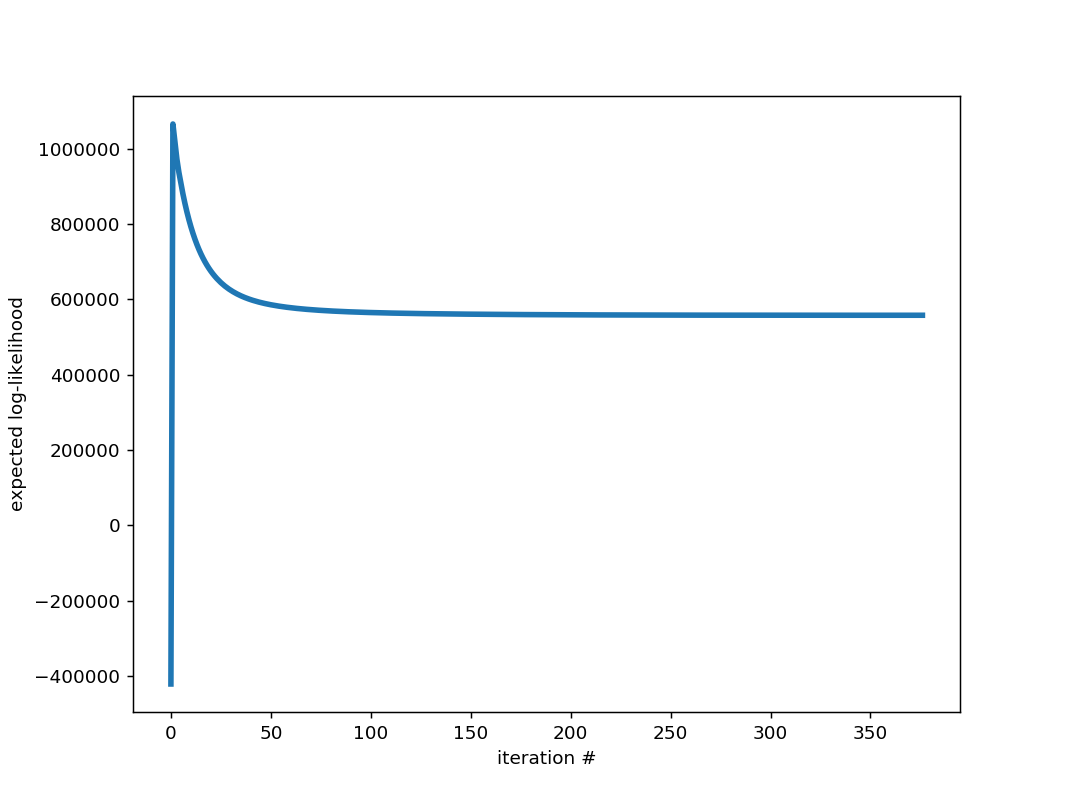

Text(0.5, 0, 'iteration #')

In [24]:
fig, ax= plt.subplots(figsize=(8, 6))
ax.plot(model.logp_, lw=3)
ax.set_ylabel('expected log-likelihood')
ax.set_xlabel('iteration #')

In [5]:
model.auc_

0.9013669291287512

In [6]:
from multidynet.metrics import calculate_auc

calculate_auc(Y, model.probas_, test_indices)

0.8999947255860423

# Country Sociability

<IPython.core.display.Javascript object>


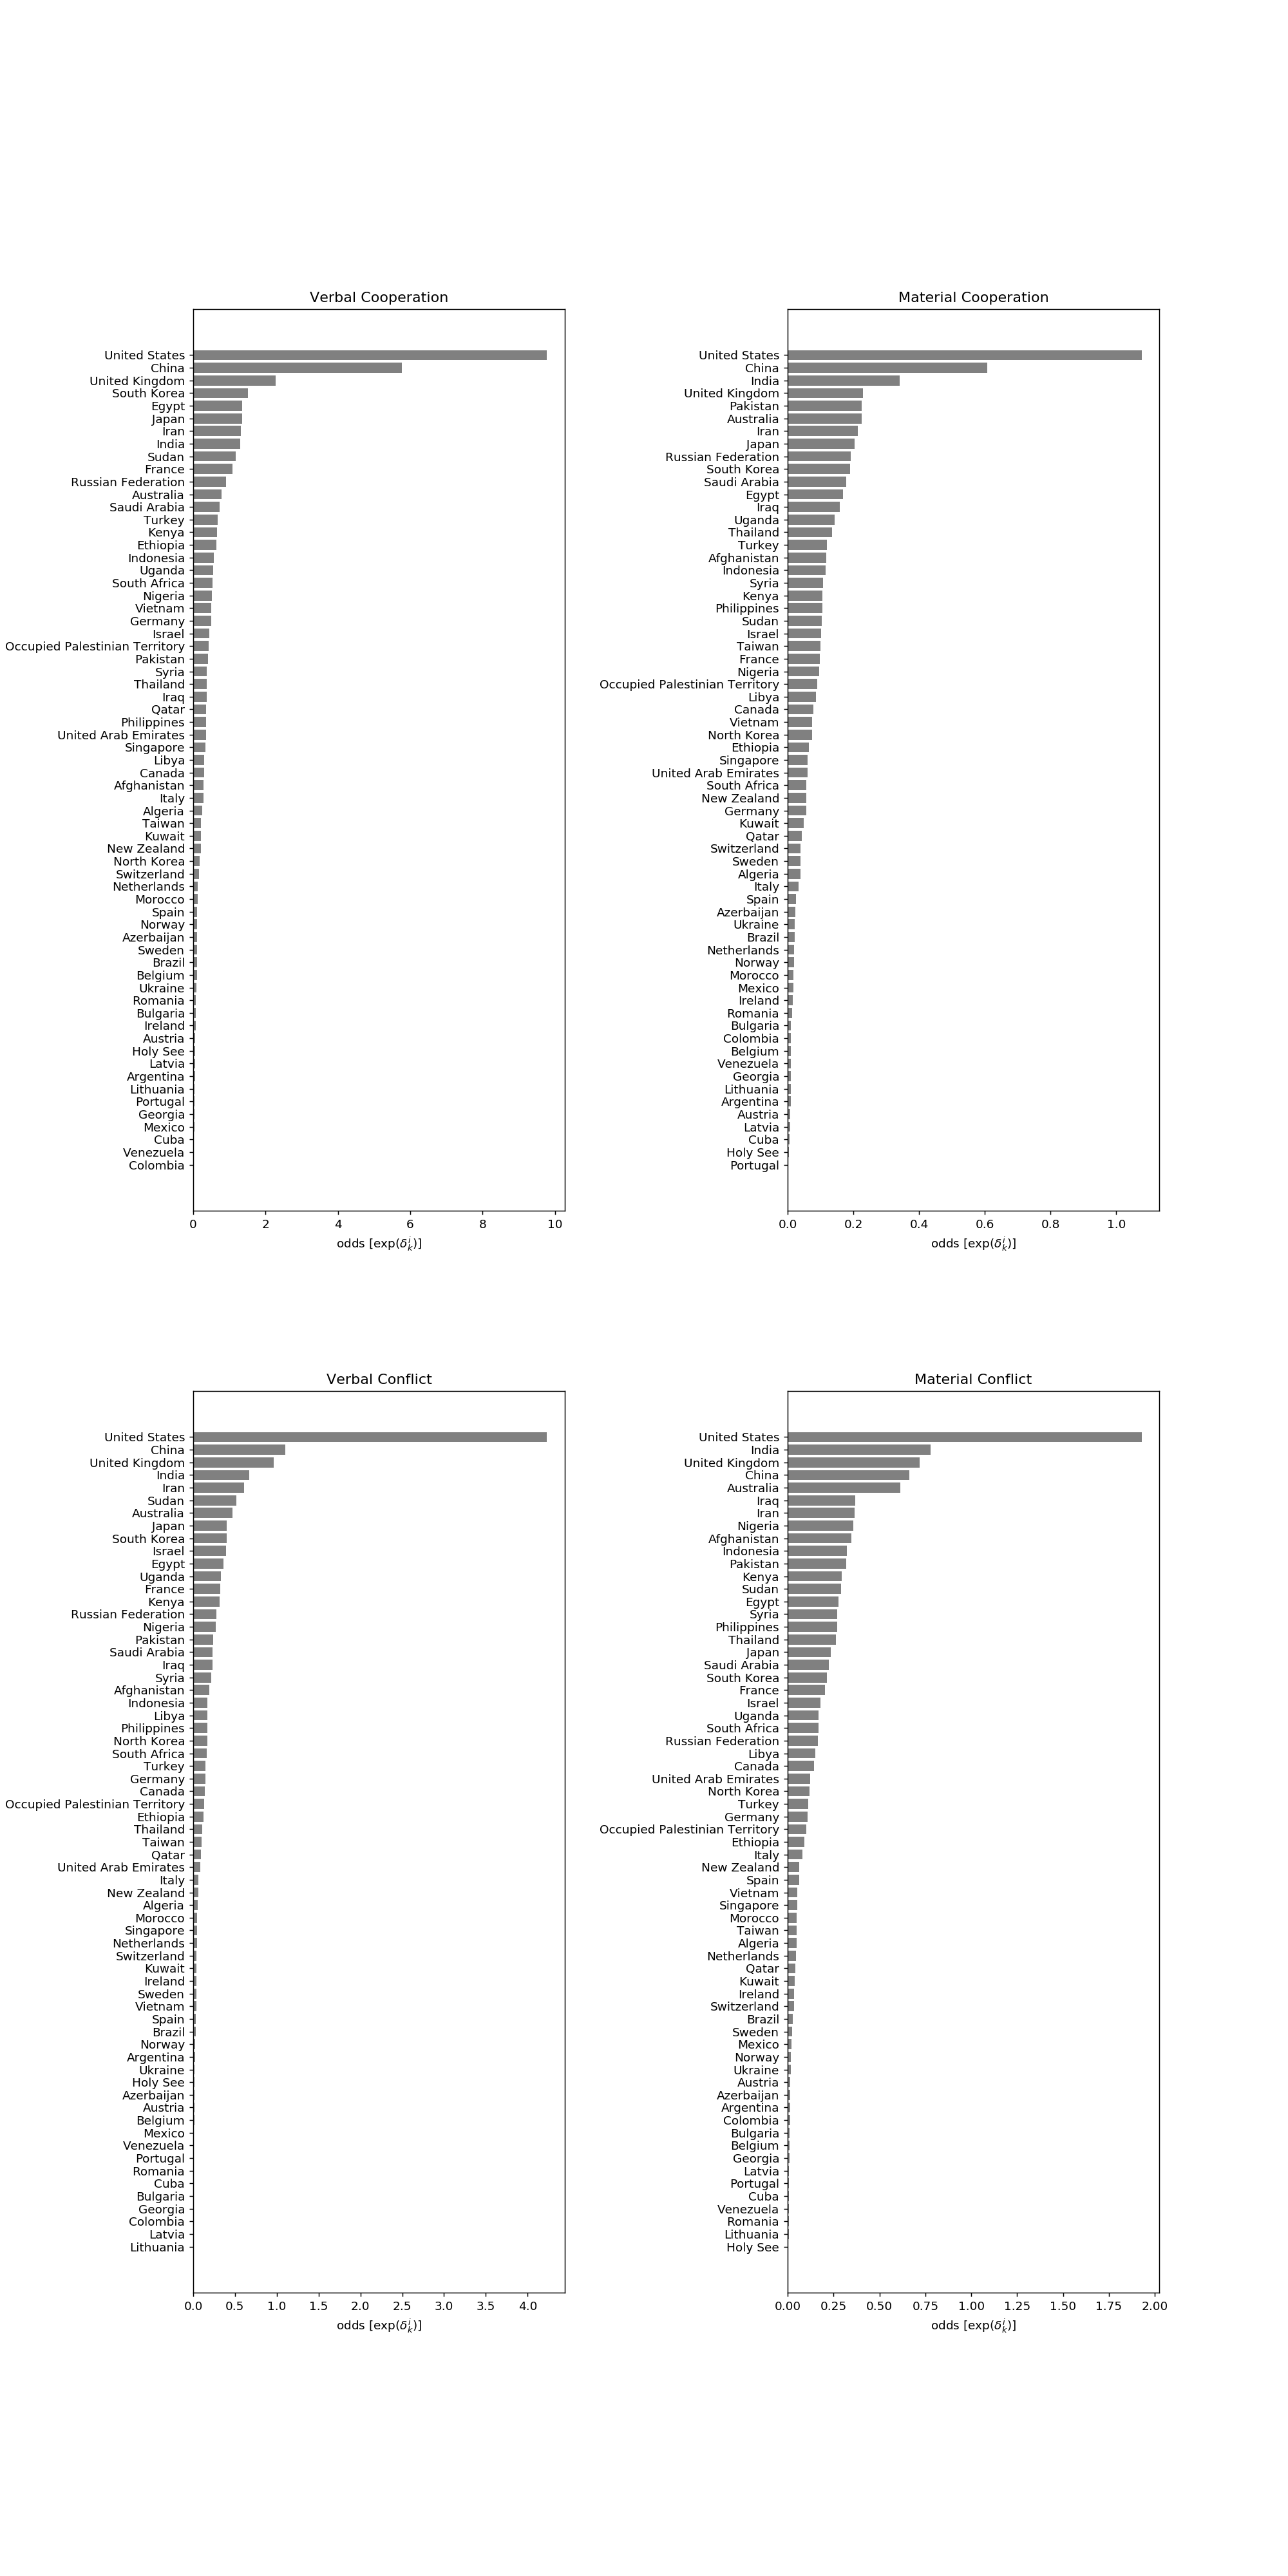

In [7]:
from multidynet.plots import plot_sociability


fig, axes = plt.subplots(2, 2, figsize=(15, 30), dpi=100)
for k, ax in enumerate(axes.flat):
    plot_sociability(model, k=k, node_labels=countries, ax=ax, layer_label=layer_labels[k])

fig.subplots_adjust(wspace=0.6, left=0.15)

# Assortativity Parameters

<IPython.core.display.Javascript object>


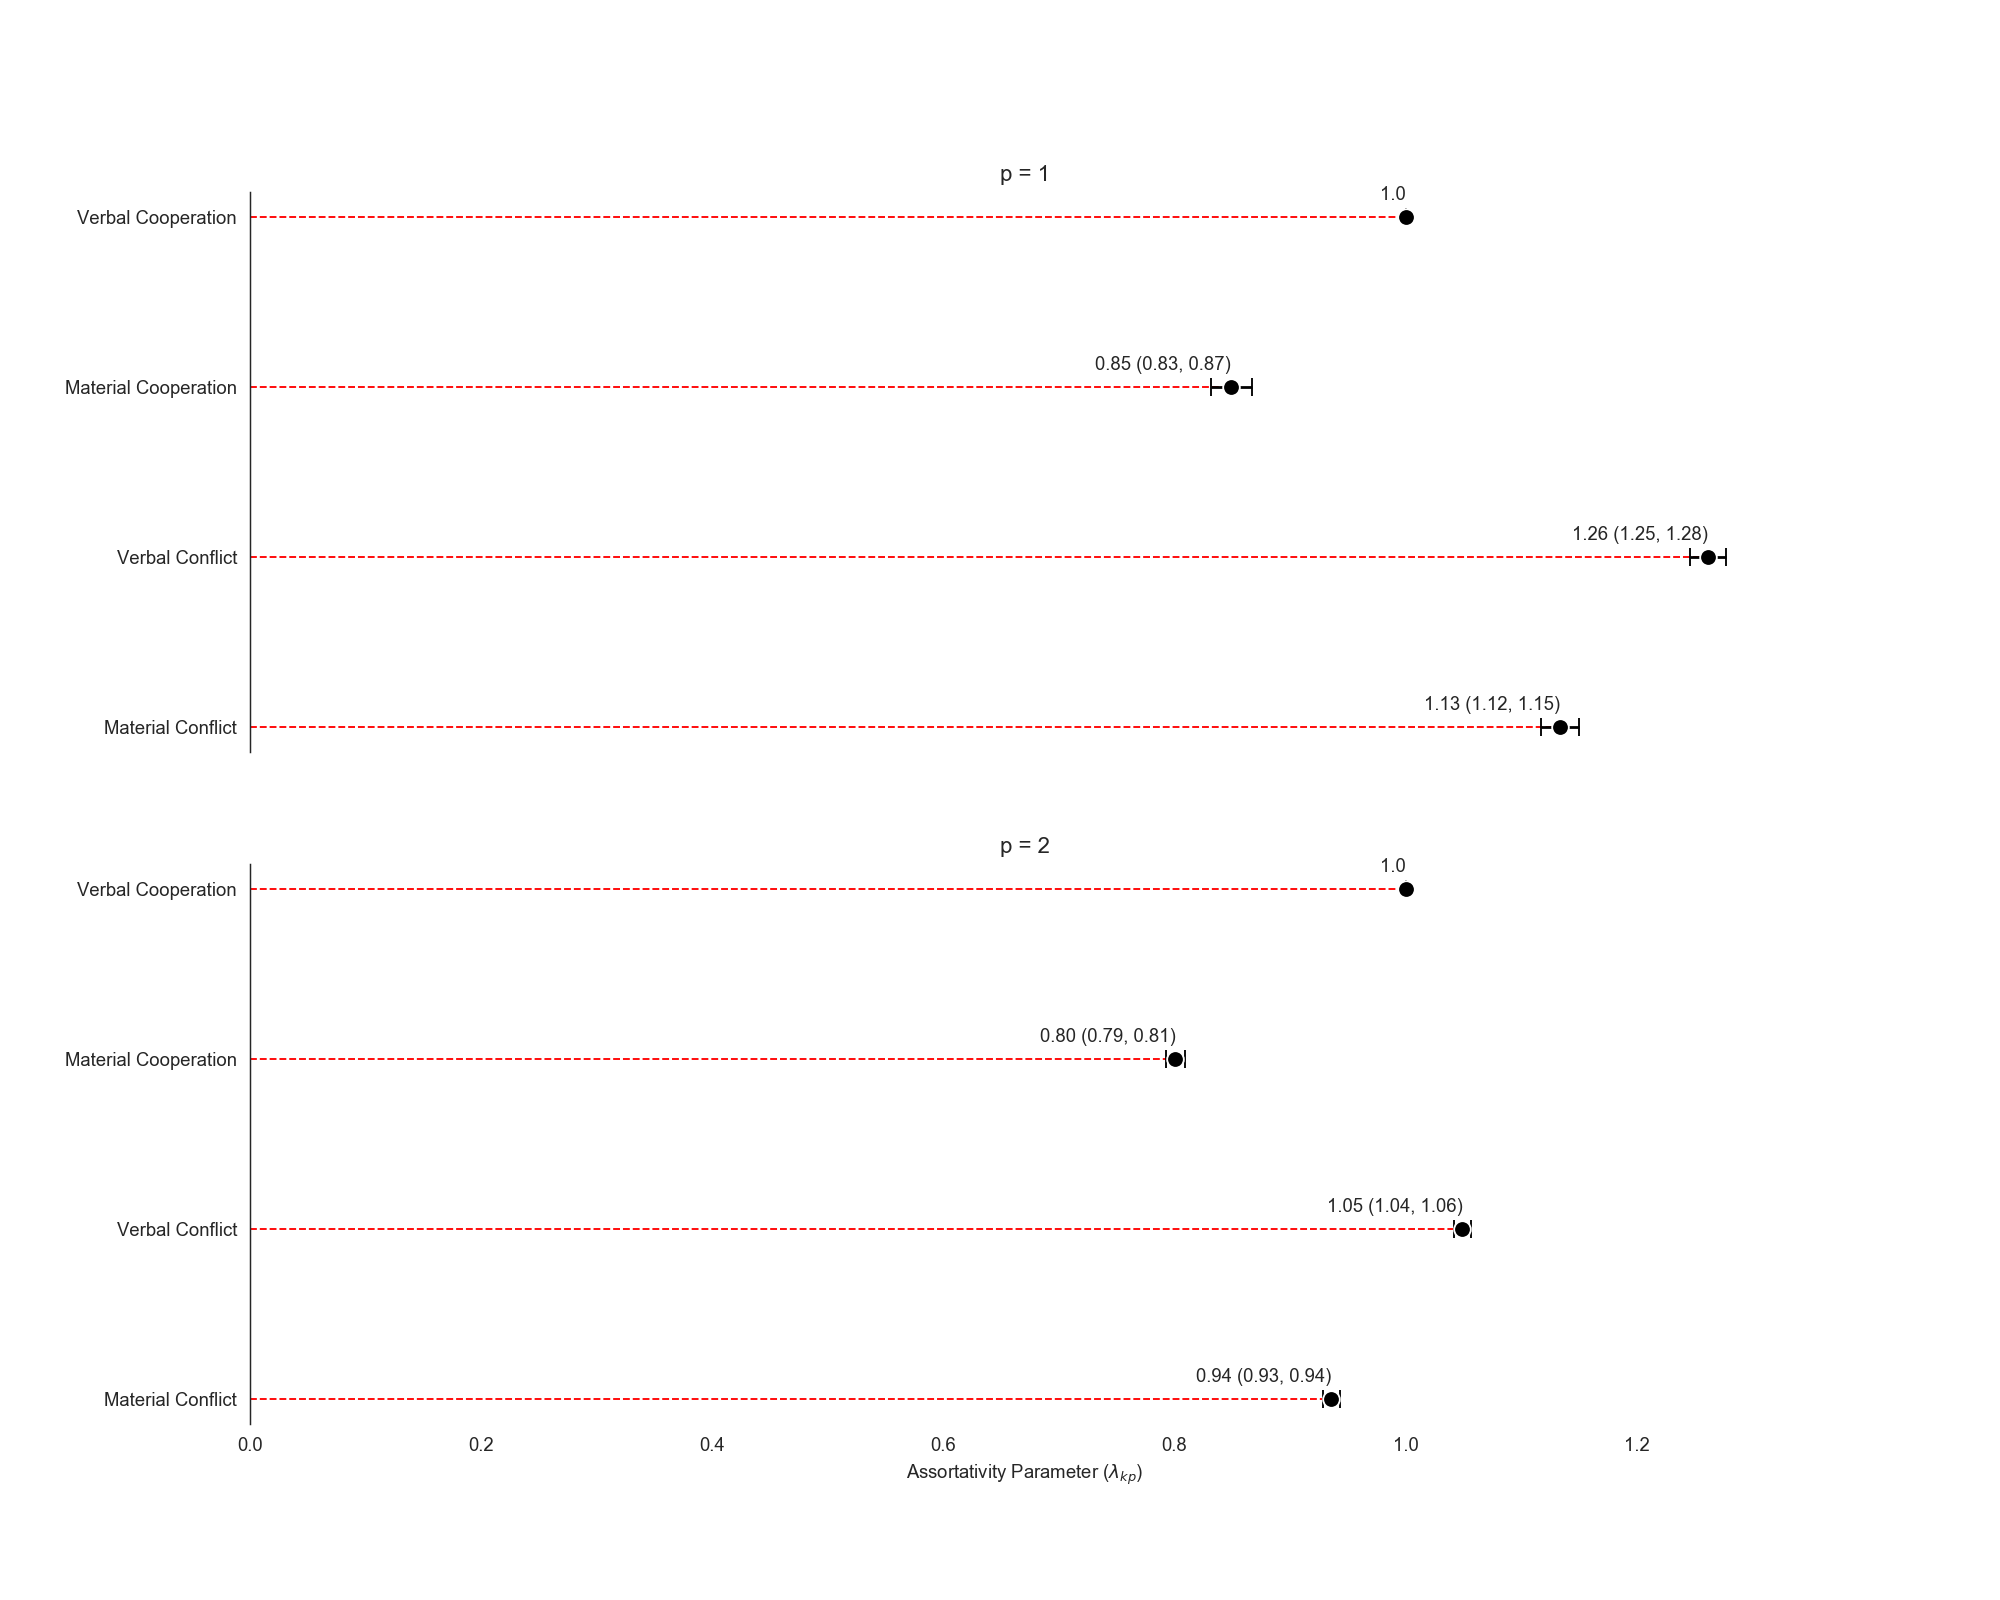

In [16]:
from multidynet.plots import plot_lambda

axes = plot_lambda(model, q_alpha=0.05, layer_labels=layer_labels, figsize=(15, 12))

# Latent Space

<IPython.core.display.Javascript object>


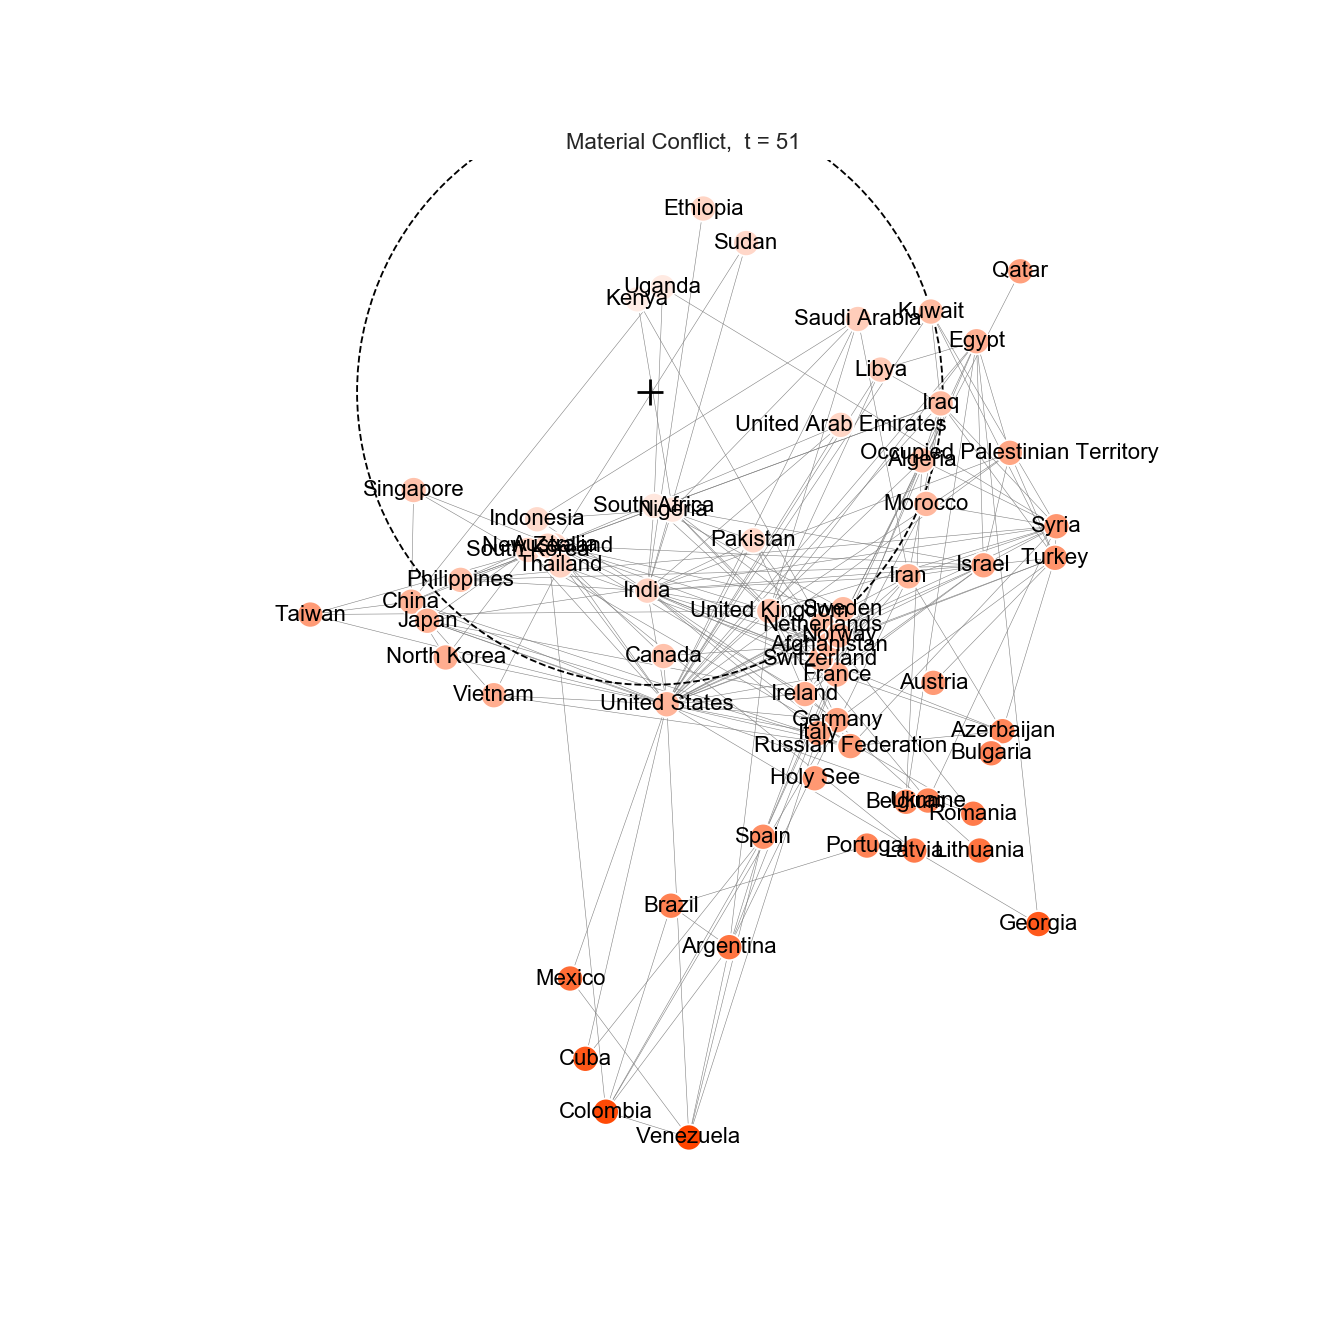

Text(0.5, 1.0, 'Material Conflict,  t = 51')

In [15]:
from multidynet.plots import plot_network, normal_contour

t = 50
k = 3

ax = plot_network(Y[k, t], model.X_[t], tau_sq=model.tau_sq_, normalize=False, node_labels=countries,
                  size=200, with_labels=True, font_size=12, 
                  edge_width=0.3, figsize=(10, 10))
ax.set_title('{},  t = {}'.format(layer_labels[k], t+1))

# Ukraine - US - Russia Relations (2014 Crimean Crisis)

<IPython.core.display.Javascript object>


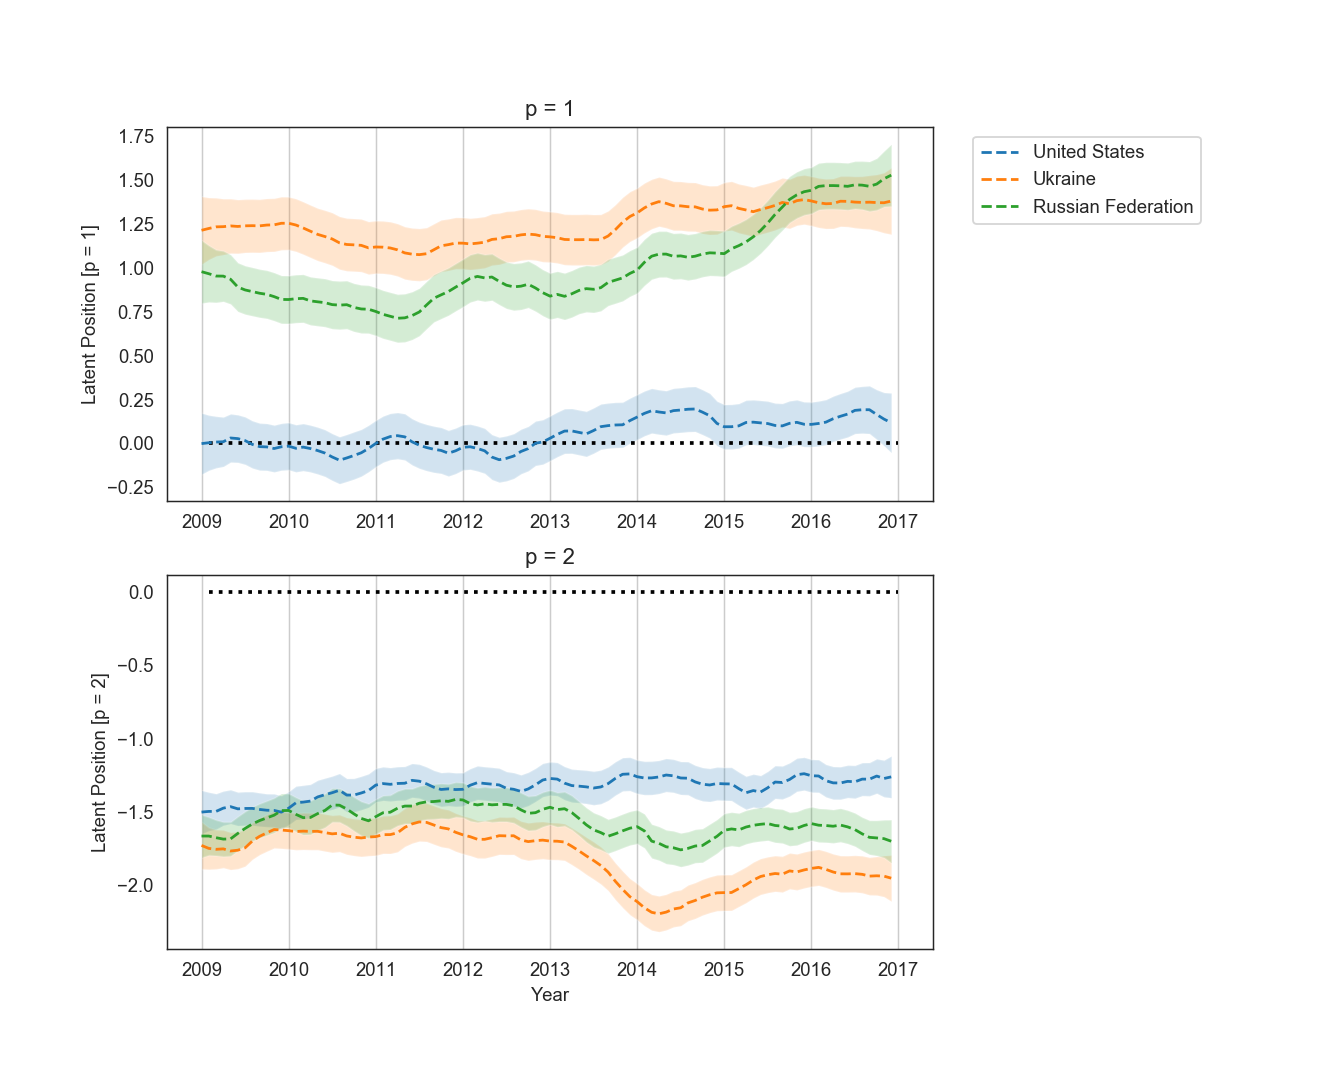

Text(0.5, 0, 'Year')

In [8]:
from multidynet.plots import plot_node_trajectories

ax = plot_node_trajectories(model, ['United States', 'Ukraine', 'Russian Federation'],
                            node_labels=countries, q_alpha=0.05, linestyle='--')

for p in range(2):
    ax[p].set_xticks([i * 12 for i in range(9)])
    ax[p].set_xticklabels([2009 + i for i in range(9)])
    ax[p].grid(axis='x')
ax[-1].set_xlabel('Year')

Means and confidence bands are obtained by sampling from the approximate posterior and calculating the $1-\alpha$ quantile region

<IPython.core.display.Javascript object>


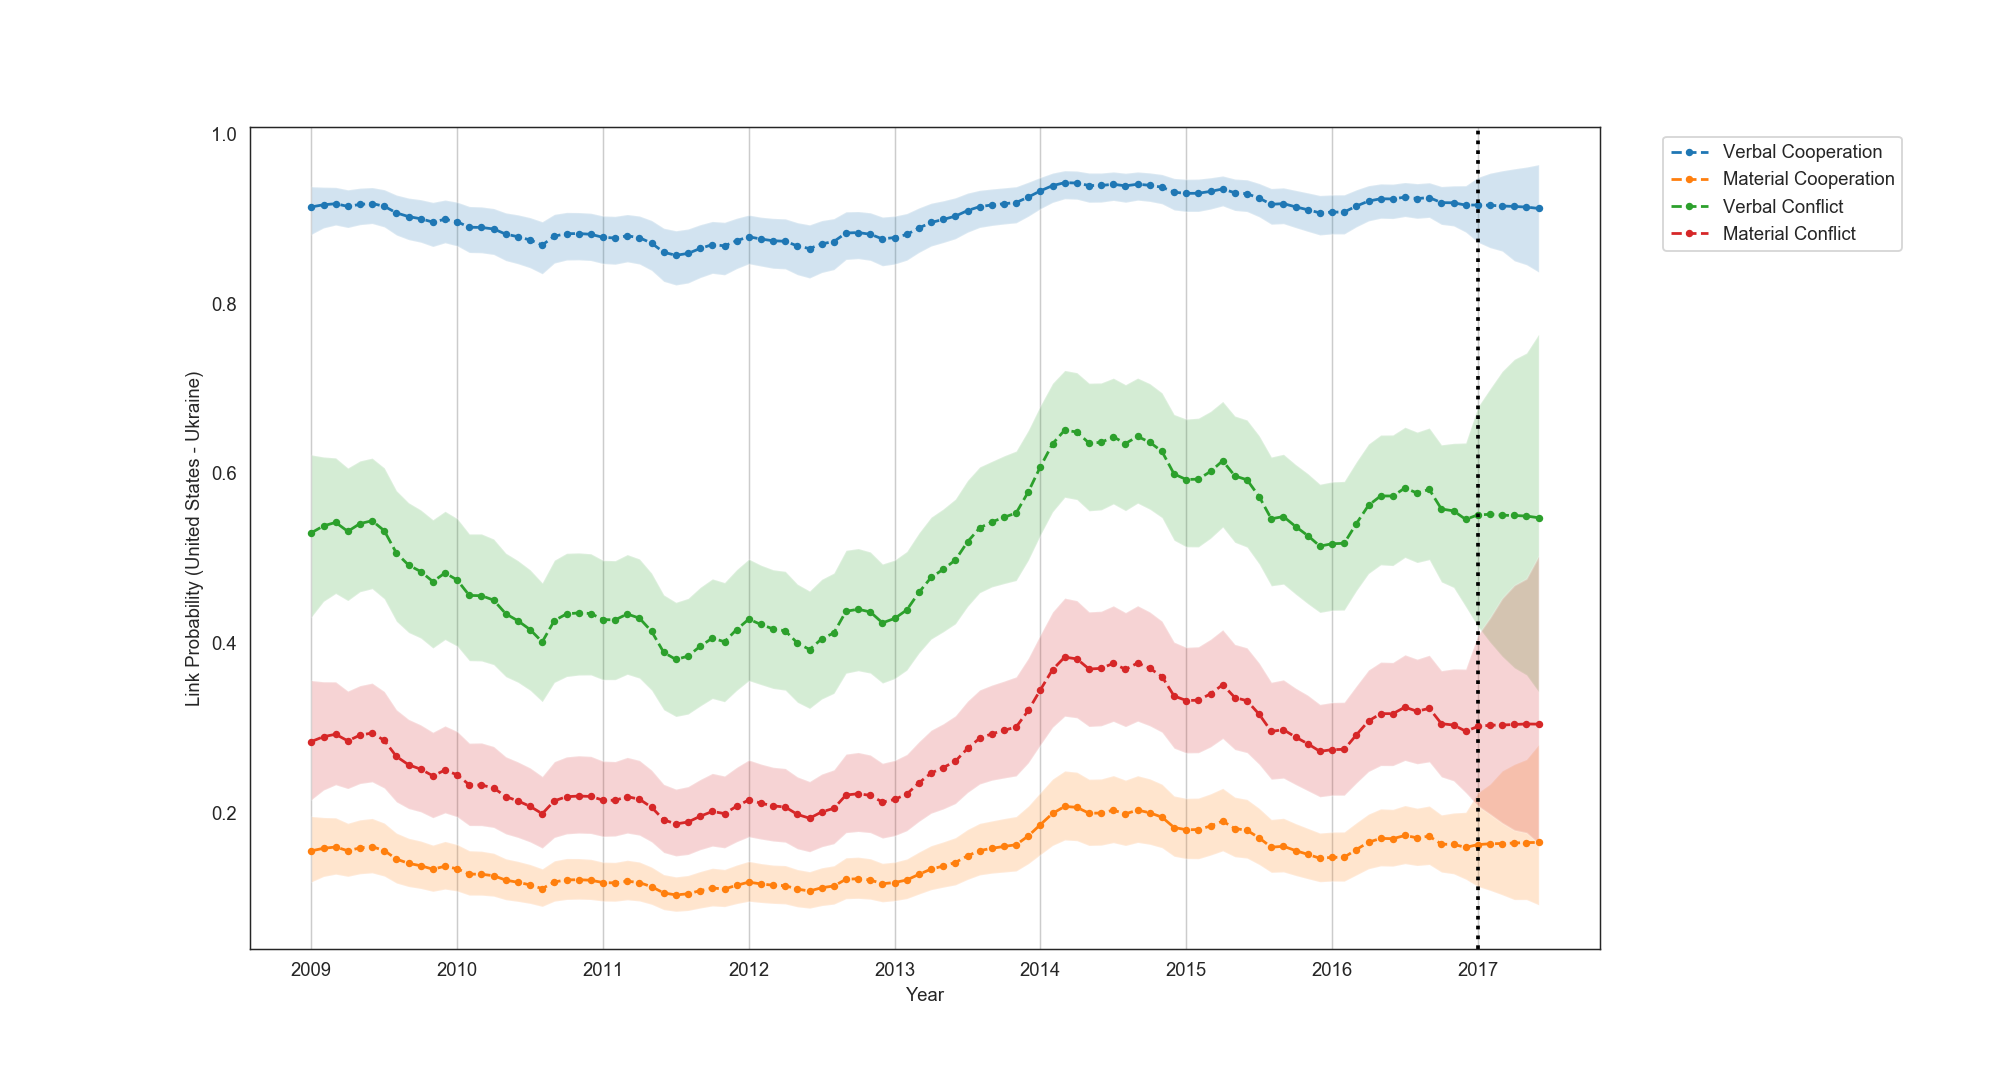

In [21]:
from multidynet.plots import plot_pairwise_probabilities

horizon = 6
fig, ax = plot_pairwise_probabilities(model, 'United States', 'Ukraine', horizon=horizon, 
                                      node_labels=countries, 
                                      linestyle='.--', figsize=(15, 8),
                                      layer_labels=layer_labels)


ax.set_xticks([i * 12 for i in range(9)])
ax.set_xticklabels([2009 + i for i in range(9)])
ax.grid(axis='x')
ax.set_xlabel('Year')

if horizon > 0:
    ax.axvline(8 * 12, 0, 1, color='k', linestyle='dotted', lw=2)

fig.subplots_adjust(right=0.8)

# Libya - US Relations (2011 Beginning of Arab Spring)

<IPython.core.display.Javascript object>


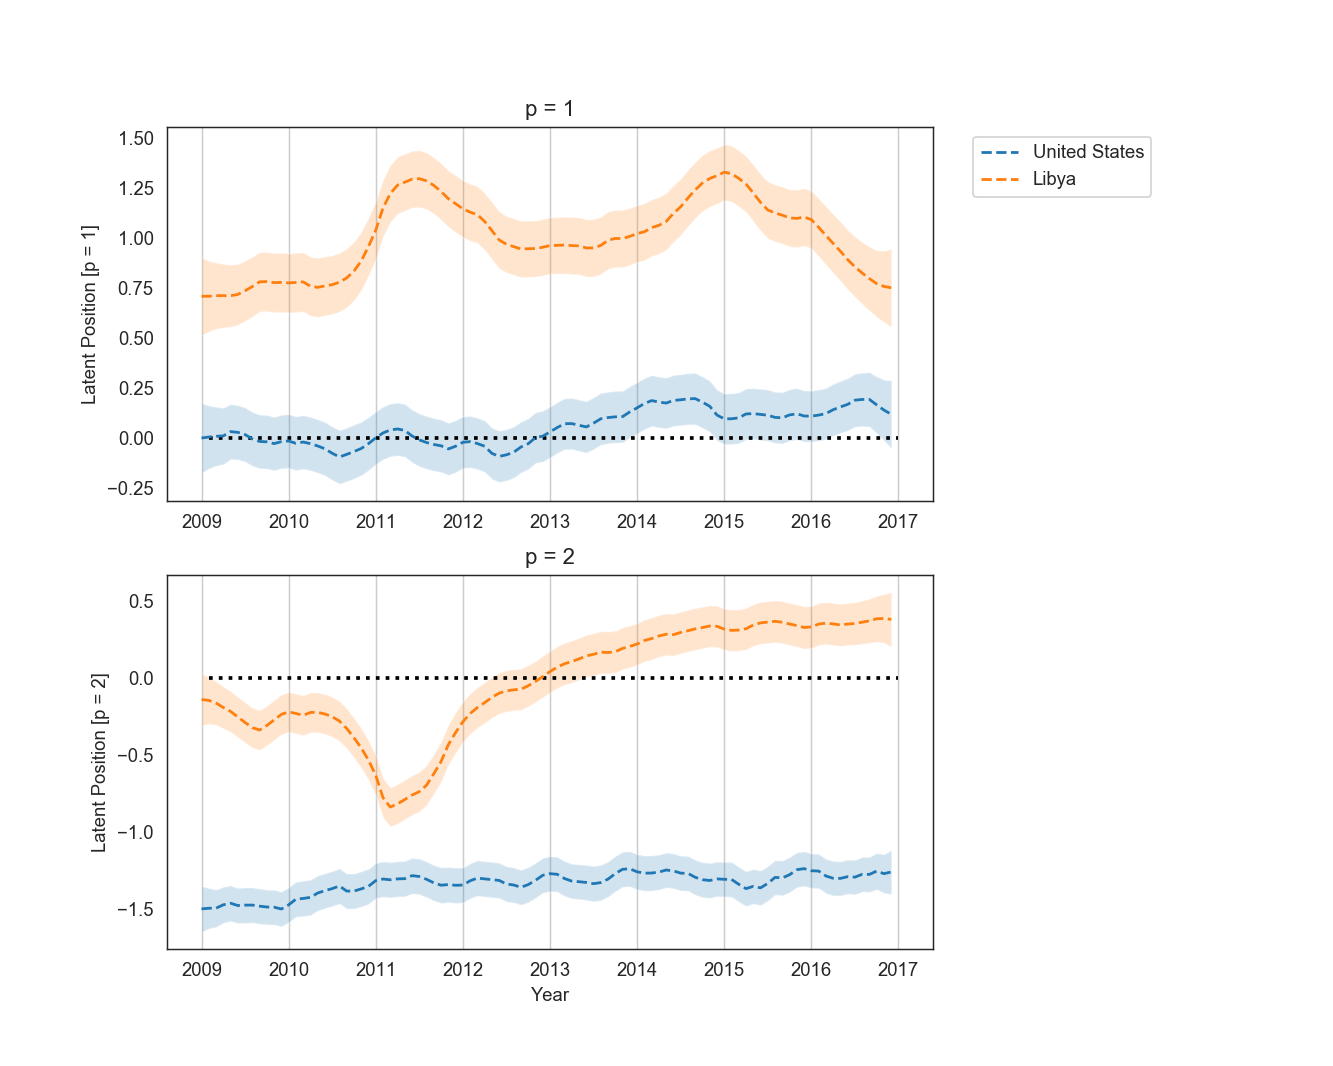

Text(0.5, 0, 'Year')

In [9]:
from multidynet.plots import plot_node_trajectories

sns.set_style('white')
ax = plot_node_trajectories(model, ['United States', 'Libya'],
                            node_labels=countries, q_alpha=0.05, linestyle='--')

for p in range(2):
    ax[p].set_xticks([i * 12 for i in range(9)])
    ax[p].set_xticklabels([2009 + i for i in range(9)])
    ax[p].grid(axis='x')
    
ax[-1].set_xlabel('Year')

<IPython.core.display.Javascript object>


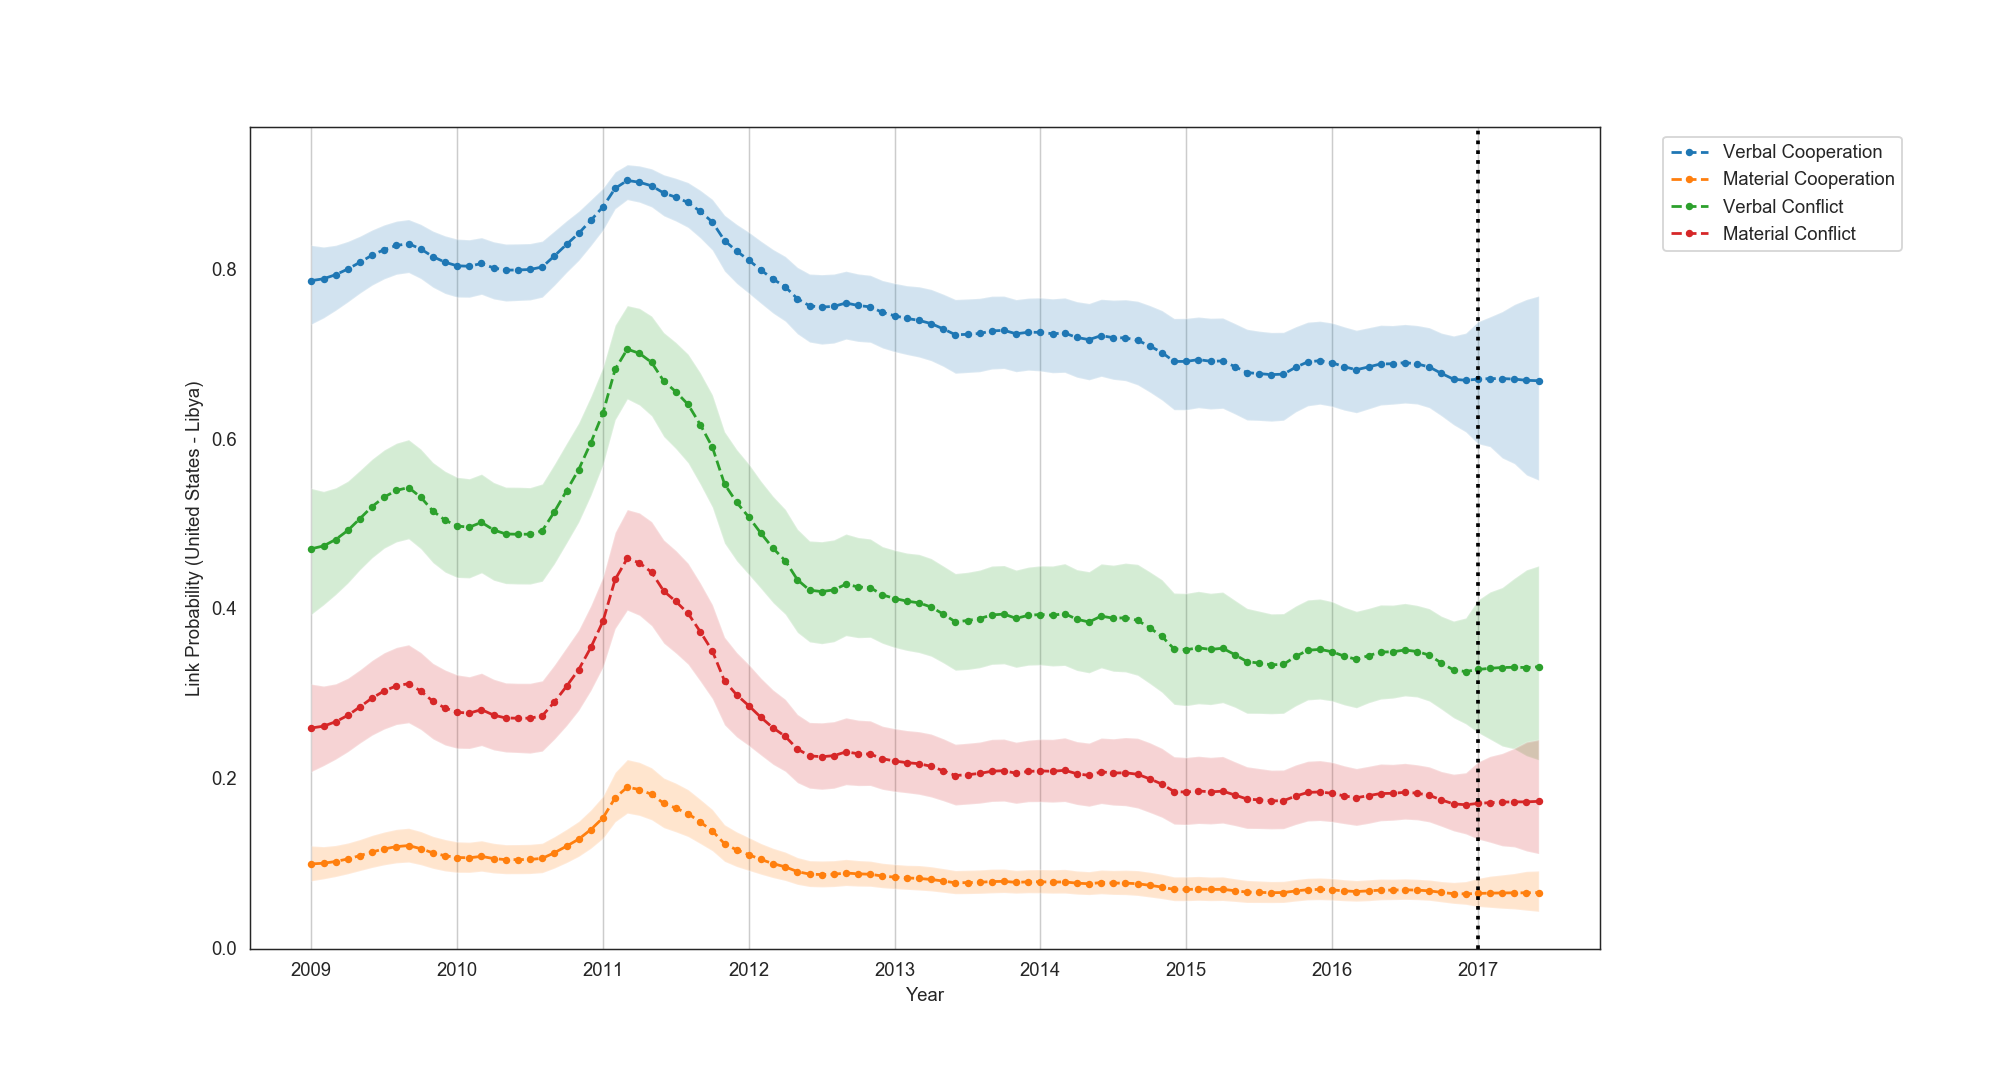

In [25]:
from multidynet.plots import plot_pairwise_probabilities

horizon = 6

fig, ax = plot_pairwise_probabilities(model, 'United States', 'Libya', horizon=horizon,
                                      node_labels=countries, layer_labels=layer_labels,
                                      linestyle='.--', figsize=(15, 8))

ax.set_xticks([i * 12 for i in range(9)])
ax.set_xticklabels([2009 + i for i in range(9)])
ax.grid(axis='x')
ax.set_xlabel('Year')

if horizon > 0:
    ax.axvline(8 * 12, 0, 1, color='k', linestyle='dotted', lw=2)

fig.subplots_adjust(right=0.8)

# Iraq - US Relations (2014 US Intervention in Iraq against ISIL)

<IPython.core.display.Javascript object>


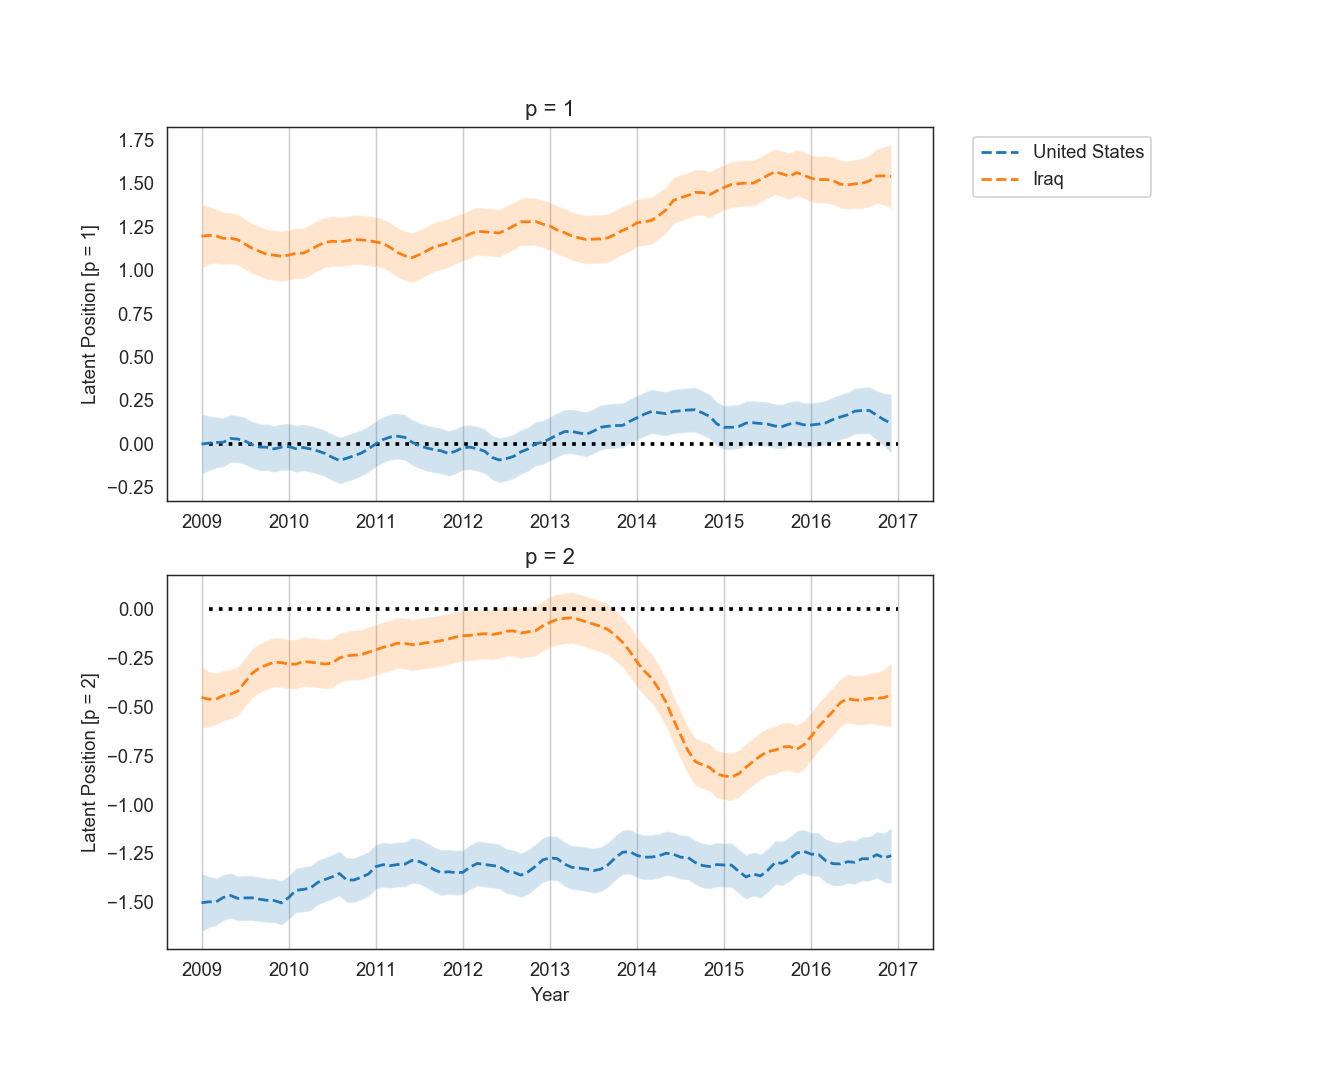

Text(0.5, 0, 'Year')

In [11]:
from multidynet.plots import plot_node_trajectories

sns.set_style('white')
ax = plot_node_trajectories(model, ['United States', 'Iraq'],
                            node_labels=countries, q_alpha=0.05, linestyle='--')

for p in range(2):
    ax[p].set_xticks([i * 12 for i in range(9)])
    ax[p].set_xticklabels([2009 + i for i in range(9)])
    ax[p].grid(axis='x')
    
ax[-1].set_xlabel('Year')

<IPython.core.display.Javascript object>


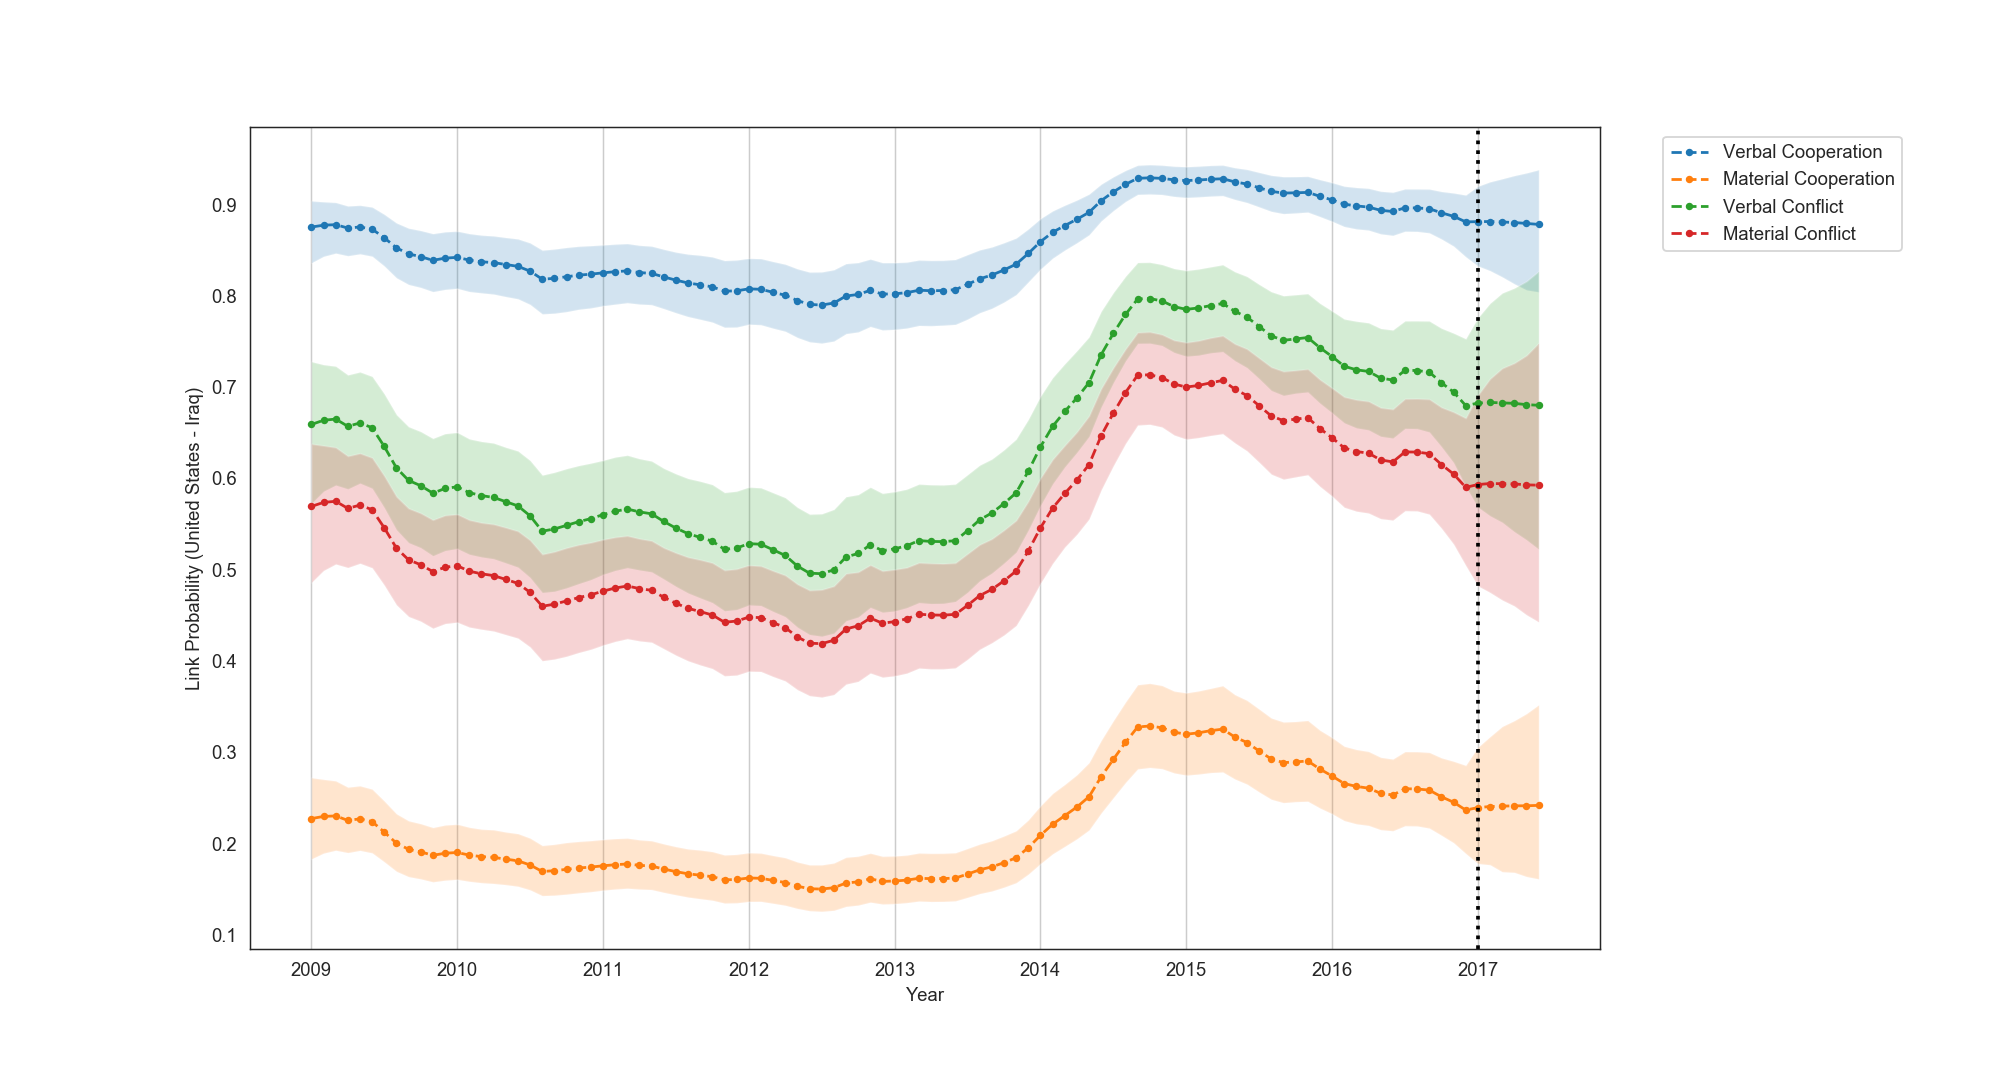

In [19]:
from multidynet.plots import plot_pairwise_probabilities

horizon = 6
fig, ax = plot_pairwise_probabilities(model, 'United States', 'Iraq', horizon=horizon, 
                                      node_labels=countries, 
                                      layer_labels=layer_labels,
                                      linestyle='.--', figsize=(15, 8))


ax.set_xticks([i * 12 for i in range(9)])
ax.set_xticklabels([2009 + i for i in range(9)])
ax.grid(axis='x')
ax.set_xlabel('Year')

if horizon > 0:
    ax.axvline(8 * 12, 0, 1, color='k', linestyle='dotted', lw=2)

fig.subplots_adjust(right=0.8)

# Subsamples

In [28]:
from multidynet.batch import subsample_nodes

rng = np.random.RandomState(123)

pos_subsample, neg_subsample, pos_ratio, neg_ratio = subsample_nodes(Y, 3, 20, 10, rng)

In [29]:
neg_ratio

array([[0.27027027, 0.22727273, 0.3030303 , 0.25      , 0.25      ,
        0.29411765, 0.25      , 0.2173913 , 0.21276596, 0.23809524,
        0.25      , 0.22222222, 0.19607843, 0.24390244, 0.22727273,
        0.23255814, 0.24390244, 0.2173913 , 0.22222222, 0.22222222,
        0.25641026, 0.23809524, 0.23255814, 0.22727273, 0.23255814,
        0.2173913 , 0.2173913 , 0.2173913 , 0.23255814, 0.23809524,
        0.23255814, 0.19230769, 0.25641026, 0.23255814, 0.24390244,
        0.19607843, 0.22727273, 0.22727273, 0.2173913 , 0.25641026,
        0.23809524, 0.25641026, 0.23255814, 0.26315789, 0.22727273,
        0.22727273, 0.23809524, 0.20408163, 0.2       , 0.2173913 ,
        0.18867925, 0.21276596, 0.22222222, 0.2173913 , 0.20833333,
        0.24390244, 0.24390244, 0.22222222, 0.23255814, 0.20408163,
        0.2       , 0.22727273, 0.25      , 0.2173913 , 0.22727273,
        0.3125    , 0.23809524, 0.24390244, 0.3030303 , 0.25641026,
        0.33333333, 0.23255814, 0.23809524, 0.22

In [30]:
pos_subsample.shape

(4, 96, 20)

In [38]:
y = np.zeros((5, 5))
y[np.tril_indices_from(y, k=-1)] = np.arange(0.5 * 5 * (5- 1)) + 1
y += y.T
y = y.astype(np.int)
y_vec = y[np.tril_indices_from(y, k=-1)]

In [39]:
y

array([[ 0,  1,  2,  4,  7],
       [ 1,  0,  3,  5,  8],
       [ 2,  3,  0,  6,  9],
       [ 4,  5,  6,  0, 10],
       [ 7,  8,  9, 10,  0]])

In [40]:
y

array([[ 0,  1,  2,  4,  7],
       [ 1,  0,  3,  5,  8],
       [ 2,  3,  0,  6,  9],
       [ 4,  5,  6,  0, 10],
       [ 7,  8,  9, 10,  0]])

In [41]:
i = 4
j = 1
y_vec[int(i * (i - 1) / 2 + j)]

8

In [66]:
from math import ceil, floor

idx = 0
i = ceil(np.sqrt(2 * (idx + 1) + 0.25) - 0.5)
j = int(idx - 0.5 * i * (i - 1)) 

In [75]:
for idx in range(y_vec.shape[0]):
    i = ceil(np.sqrt(2 * (idx + 1) + 0.25) - 0.5)
    j = int(idx - 0.5 * i * (i - 1)) 
    print(y_vec[idx], y[i, j], (i, j))
    

1 1 (1, 0)
2 2 (2, 0)
3 3 (2, 1)
4 4 (3, 0)
5 5 (3, 1)
6 6 (3, 2)
7 7 (4, 0)
8 8 (4, 1)
9 9 (4, 2)
10 10 (4, 3)


In [76]:
y

array([[ 0,  1,  2,  4,  7],
       [ 1,  0,  3,  5,  8],
       [ 2,  3,  0,  6,  9],
       [ 4,  5,  6,  0, 10],
       [ 7,  8,  9, 10,  0]])

In [70]:
y[i, j]

1

In [71]:
y_vec[idx]

1

In [35]:
i * (i - 1) / 2 + j

1.0

In [38]:
y

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [77]:
pos_subsample[0, 0]

array([26,  2,  2,  7, 37, 41, 20, 53, 47,  1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [80]:
dyads = set()

In [97]:
dyads.add(tuple(sorted([0, 1]))
dyads.add(sorted([2, 1]))
dyads.add(sorted([1, 2]))

TypeError: unhashable type: 'list'

In [88]:
np.asarray(list(dyads))


array([[0, 1],
       [1, 2],
       [2, 1]])

In [92]:
tuple(sorted((1, 0)))

(0, 1)

In [95]:
sorted([1, 0])

[0, 1]

In [102]:
unique_dyads = set(tuple(sorted(l, reverse=True)) for l in dyads)
np.asarray(list(unique_dyads))

array([[1, 0],
       [2, 1]])

In [104]:
4000 * (4000 - 1) * 3 * 24

1151712000

In [100]:
?sorted

In [33]:

k = 0
t = 0
y_vec = Y[k, t][np.tril_indices_from(Y[k, t], k=-1)]

In [35]:
y_vec.shape

(2080,)

In [36]:
0.5 * 65 * (65 - 1)

2080.0